In [1]:
import pandas as pd
import numpy as np
from code_ import thinkbayes

On November 1, 2007, contestants named Letia and Nathaniel appeared on The Price
is Right, an American game show. They competed in a game called The Showcase, where
the objective is to guess the price of a showcase of prizes. The contestant who comes
closest to the actual price of the showcase, without going over, wins the prizes.

For a Bayesian thinker, this scenario suggests several questions:
1. Before seeing the prizes, what prior beliefs should the contestant have about the
price of the showcase?
2. After seeing the prizes, how should the contestant update those beliefs?
3. Based on the posterior distribution, what should the contestant bid?

In [28]:
def process_df(df, year=None):
    df = df.T
    df.columns = df.iloc[0]
    df = df.iloc[1:]
    if year is not None:
        df.index = df.index + f' {year}'
    df[['Showcase 1', 'Showcase 2', 'Bid 1', 'Bid 2','Difference 1', 'Difference 2']] = (
            df[['Showcase 1', 'Showcase 2', 'Bid 1', 'Bid 2',
            'Difference 1', 'Difference 2'
        ]].astype(float)
    )
    return df

In [29]:
df_2011 = process_df(pd.read_csv('code_/showcases.2011.csv'), year=2011)
df_2012 = process_df(pd.read_csv('code_/showcases.2012.csv'), year=2012)
df = df_2011.append(df_2012)
# del(df_2011, df_2012)
df.head()
# df_2011.head()

/tmp/ipykernel_10066/569742392.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_2011.append(df_2012)


Date,Duno,Showcase 1,Showcase 2,Bid 1,Bid 2,Difference 1,Difference 2
Sep. 19 2011,5631K,50969.0,45429.0,42000.0,34000.0,8969.0,11429.0
Sep. 20 2011,5632K,21901.0,34061.0,14000.0,59900.0,7901.0,-25839.0
Sep. 21 2011,5633K,32815.0,53186.0,32000.0,45000.0,815.0,8186.0
Sep. 22 2011,5634K,44432.0,31428.0,27000.0,38000.0,17432.0,-6572.0
Sep. 23 2011,5635K,24273.0,22320.0,18750.0,23000.0,5523.0,-680.0


<AxesSubplot:ylabel='Density'>

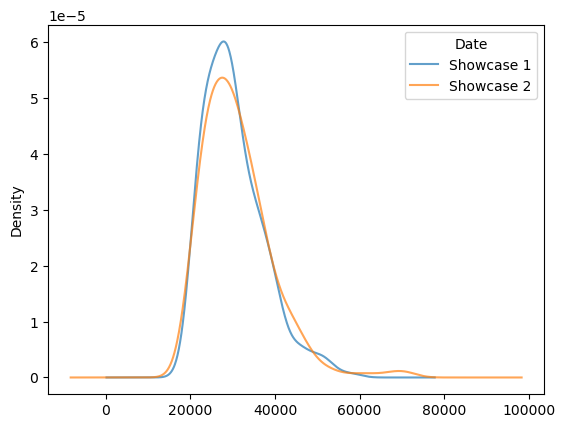

In [34]:
df[['Showcase 1', 'Showcase 2']].plot(kind='kde', alpha=0.7)#, bins=20)

In [35]:
df.describe()

Date,Showcase 1,Showcase 2,Bid 1,Bid 2,Difference 1,Difference 2
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,30299.488818,31047.680511,26183.092652,27371.789137,4116.396166,3675.891374
std,7145.705405,8293.059002,6470.507122,6303.572665,6899.909806,6886.260711
min,19563.000000,18349.000000,5500.000000,15000.000000,-14187.000000,-25839.000000
25%,24866.000000,25264.000000,22000.000000,23000.000000,26.000000,-587.000000
50%,28958.000000,29488.000000,25620.000000,27000.000000,3902.000000,3136.000000
75%,34428.000000,34665.000000,29900.000000,30777.000000,7800.000000,7829.000000
max,58342.000000,71628.000000,50972.000000,59900.000000,31374.000000,43628.000000


In [42]:
prices = df['Showcase 1'].append(df['Showcase 2']).values
prices

/tmp/ipykernel_10066/3952621190.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prices = df['Showcase 1'].append(df['Showcase 2']).values


array([50969., 21901., 32815., 44432., 24273., 30554., 20963., 28941.,
       25851., 28800., 37703., 34774., 25268., 44044., 32516., 30827.,
       40374., 27698., 23590., 38625., 24026., 37449., 34268., 22281.,
       22890., 24226., 25448., 32525., 36799., 27380., 25903., 31769.,
       22853., 23202., 20721., 28451., 26154., 27019., 51959., 35811.,
       24885., 24648., 30707., 23744., 45078., 20773., 30892., 29971.,
       37423., 33593., 24866., 24628., 24827., 29248., 24818., 28762.,
       31838., 22268., 38892., 22599., 31705., 23299., 21394., 22589.,
       30573., 33009., 19612., 28550., 49937., 36915., 33400., 34516.,
       31516., 51108., 23981., 26383., 39801., 39201., 19563., 20418.,
       28465., 22356., 24150., 20425., 23926., 20860., 35526., 20912.,
       27426., 26393., 25329., 22434., 31933., 23986., 24729., 21747.,
       27273., 21681., 29324., 35874., 30397., 27310., 28414., 32535.,
       22886., 29842., 35954., 27883., 31268., 21563., 39642., 21862.,
      

In [44]:
pdf = thinkbayes.EstimatedPdf(prices)
low, high = 0, 75000
n = 101
xs = np.linspace(low, high, n)
pmf = pdf.MakePmf(xs)

In [45]:
pmf.Prob(51000)

0.0024804133642668835

In [46]:
pdf.kde.evaluate(50000)

array([3.81388951e-06])

In [47]:
bids = df['Bid 1'].append(df['Bid 2']).values

/tmp/ipykernel_10066/1254500359.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bids = df['Bid 1'].append(df['Bid 2']).values


In [48]:
diffs = prices - bids

In [89]:
class Price(thinkbayes.Suite):
    def __init__(self, pmf, player, name=''):
        """Constructs the suite.

        pmf: prior distribution of price
        player: Player object
        name: string
        """
        thinkbayes.Suite.__init__(self, pmf)
        self.player = player
        self.name =name

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: actual price
        data: the contestant's guess
        """
        price = hypo # hypothetical price of showcase
        guess = data # data = contestants best guess
        error = price - guess
        
        like = self.player.ErrorDensity(error)
        return like
        
class GainCalculator(object):
    """Encapsulates computation of expected gain."""

    def __init__(self, player, opponent):
        """Constructs the calculator.

        player: Player
        opponent: Player
        """
        self.player = player
        self.opponent = opponent

    def ExpectedGains(self, low=0, high=75000, n=101):
        """Computes expected gains for a range of bids.

        low: low bid
        high: high bid
        n: number of bids to evaluates

        returns: tuple (sequence of bids, sequence of gains)
    
        """
        bids = np.linspace(low, high, n)

        gains = [self.ExpectedGain(bid) for bid in bids]

        return bids, gains

    def ExpectedGain(self, bid):
        """Computes the expected return of a given bid.

        bid: your bid
        """
        suite = self.player.posterior
        total = 0
        for price, prob in sorted(suite.Items()):
            gain = self.Gain(bid, price)
            total += prob * gain
        return total

    def Gain(self, bid, price):
        """Computes the return of a bid, given the actual price.

        bid: number
        price: actual price
        """
        # if you overbid, you get nothing
        if bid > price:
            return 0

        # otherwise compute the probability of winning
        diff = price - bid
        prob = self.ProbWin(diff)

        # if you are within 250 dollars, you win both showcases
        if diff <= 250:
            return 2 * price * prob
        else:
            return price * prob

    def ProbWin(self, diff):
        """Computes the probability of winning for a given diff.

        diff: how much your bid was off by
        """
        prob = (self.opponent.ProbOverbid() + 
                self.opponent.ProbWorseThan(diff))
        return prob

class Player(object):
    """Represents a player on The Price is Right."""
    def __init__(self, prices, bids, diffs, mu=0):
        """Construct the Player.

        prices: sequence of prices
        bids: sequence of bids
        diffs: sequence of underness (negative means over)
        """
        # smoothed PDF estemated by KDE
        self.pdf_price = thinkbayes.EstimatedPdf(prices)
        # cummulative distribution of diff
        self.cdf_diff = thinkbayes.MakeCdfFromList(diffs)
        sigma = np.std(diffs)
        # PDF that characterizes errors. assumed gaussian distr with mean=0 and std=std_diff
        self.pdf_error = thinkbayes.GaussianPdf(mu, sigma)

        n = 101
        self.price_xs = np.linspace(0, 75000, n)
    
    def ErrorDensity(self, error):
        """
        Density of the given error in the distribution of error.
        error: how much the bid is under the actual price

        ErrorDensity works by evaluating pdf_error at the given value of error. The result is
        a probability density, so it is not really a probability. But remember that Likelihood
        doesn’t need to compute a probability; it only has to compute something proportional
        to a probability. As long as the constant of proportionality is the same for all likelihoods,
        it gets canceled out when we normalize the posterior distribution.
        And therefore, a probability density is a perfectly good likelihood.
        """
        return self.pdf_error.Density(error)

    def PmfPrice(self):
        """Returns a new Pmf of prices.

        A discrete version of the estimated Pdf.
        """
        return self.pdf_price.MakePmf(self.price_xs)
    
    def CdfDiff(self):
        """Returns a reference to the Cdf of differences (underness).
        """
        return self.cdf_diff

    def ProbOverbid(self):
        """Returns the probability this player overbids.
        """
        return self.cdf_diff.Prob(-1)

    def ProbWorseThan(self, diff):
        """Probability this player's diff is greater than the given diff.

        diff: how much the opponent is off by (always positive)
        """
        return 1 - self.cdf_diff.Prob(diff)

    def MakeBeliefs(self, guess):
        """Makes a posterior distribution based on estimated price.

        Sets attributes prior and posterior.

        guess: what the player thinks the showcase is worth        
        """
        pmf = self.PmfPrice()
        self.prior = Price(pmf, self, name='prior')
        self.posterior = self.prior.Copy(name='posterior')
        self.posterior.Update(guess)

    def OptimalBid(self, guess, opponent):
        """Computes the bid that maximizes expected return.
        
        guess: what the player thinks the showcase is worth 
        opponent: Player

        Returns: (optimal bid, expected gain)
        """
        self.MakeBeliefs(guess)
        calc = GainCalculator(self, opponent)
        bids, gains = calc.ExpectedGains()
        gain, bid = max(zip(gains, bids))
        return bid, gain


In [57]:
p = Player(prices, bids, diffs)

In [55]:
p.cdf_diff.Prob(0)

0.268370607028754

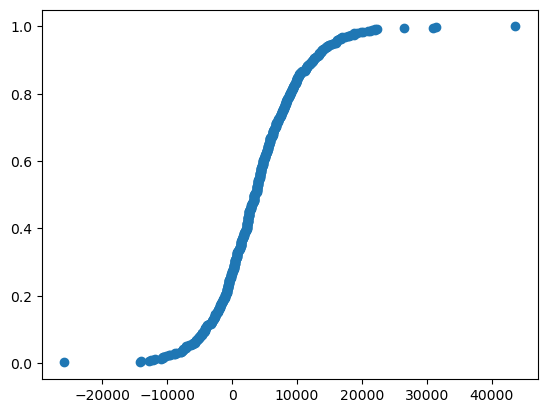

In [54]:
import matplotlib.pyplot as plt

y = []
for diff in diffs:
    y.append(p.cdf_diff.Prob(diff))

plt.scatter(diffs, y)

Model the players separately. Some guesses can be strategic - if I think that P1 overbid I minght underbid by far to be sure I won't overshoot. In that case I would have won. 

In [59]:
bids1 = df['Bid 1'].values
bids2 = df['Bid 2'].values
prices1 = df['Showcase 1'].values
prices2 = df['Showcase 2'].values

In [90]:
p1 = Player(prices1, bids1, prices1 - bids1)

In [91]:
prior = p1.PmfPrice()

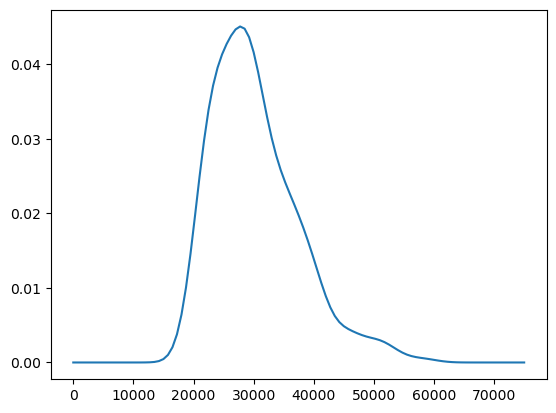

In [92]:
x, y = [], []
for k, v in prior.GetDict().items():
    x.append(k)
    y.append(v)

plt.plot(x, y)

In [93]:
p1.MakeBeliefs(20000)

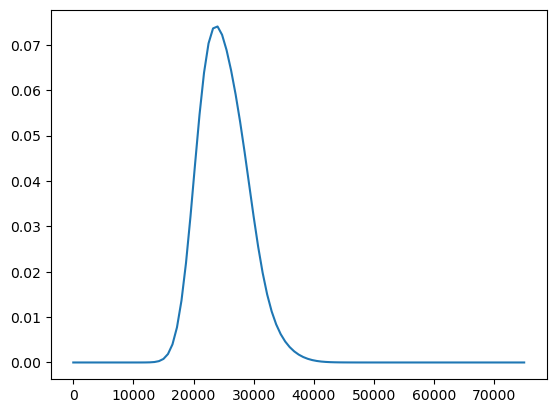

In [94]:

x2, y2 = [], []
for k, v in p1.posterior.GetDict().items():
    x2.append(k)
    y2.append(v)

plt.plot(x2, y2)

In [95]:
p1.posterior.MaximumLikelihood()

24000.0

In [96]:
cdf = p1.posterior.MakeCdf()

In [97]:
cdf.Prob(25000) - cdf.Prob(20001)

0.452360783750351

In [98]:
cdf.Prob(19999)

0.08262620286823547

In [100]:
p2 = Player(prices2, bids2, prices2 - bids2)
p1.OptimalBid(20000, p2)

(21000.0, 16668.78146356439)